In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from openfield import *

In [2]:
epw_file = r"C:\Users\tgerrish\Desktop\weatherfile_AlBateen.epw"
idd_file = r"C:\openstudio-2.7.0\EnergyPlus\Energy+.idd"

In [3]:
# Calculate sky radiation
direct_rad, diffuse_rad = radiation.run(epw_file)

Found 0 opaque surfaces.
Found 0 fenestration surfaces.
Found 0 window-groups.
Writing recipe contents to: C:\Users\tgerrish\AppData\Local\Temp\openfield\gridbased_annual
Calculating solar values...
# Number of sun up hours: 4416
Writing sun matrix to C:\Users\tgerrish\AppData\Local\Temp\openfield\gridbased_annual\sky\sunmtx.smx
Direct and diffuse solar radiation simulation completed


In [4]:
# Define the ground
gnd = ground.Ground()

# Calculate surface temperature
ground_surface_temperature = gnd.calculate_surface_temperature(epw_file, idd_file, is_shaded=False)

# Calculate ground surface temperature
mean_radiant_temperature = mrt.mean_radiant_temperature(epw_file, direct_rad, diffuse_rad, ground=gnd, is_shaded=False)

# Calculate universal thermal climate index
universal_thermal_climate_index = utci.universal_thermal_climate_index(epw_file, mean_radiant_temperature)

Ground surface temperature simulation completed
Mean radiant temperature calculation completed
Universal Thermal Climate Index calculation completed


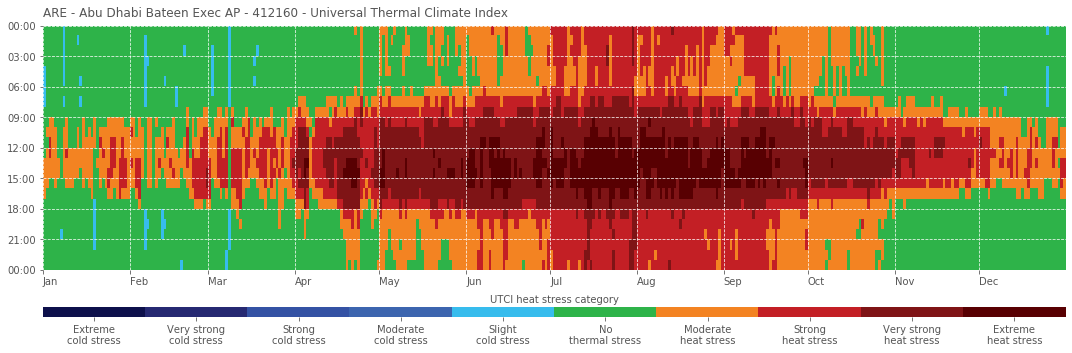

In [5]:
from ladybug.epw import EPW
e = EPW(epw_file).location

# Plot the generic UTCI (using calculated Mean Radiant Temperature with Dry-bulb Temperature, Relative Humidity and Wind Speed from the EPW file)
plot.heatmap(universal_thermal_climate_index.values, plot_type="comfort", location_string="{} - {} - {}".format(e.country, e.city, e.station_id))

In [6]:
# Generate a set of UTCI values for different mitigation conditions
utci_dict = mitigations.utci_comparison(epw_file, idd_file, direct_horizontal_solar=direct_rad, diffuse_horizontal_solar=diffuse_rad)

Ground surface temperature simulation completed
Mean radiant temperature calculation completed
Calculating UTCI for Baseline_Shaded_EvaporativeCooling_NoWind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_Shaded_EvaporativeCooling_Wind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_Shaded_NoWind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_Shaded_Wind
Universal Thermal Climate Index calculation completed
Ground surface temperature simulation completed
Mean radiant temperature calculation completed
Calculating UTCI for Baseline_EvaporativeCooling_NoWind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_EvaporativeCooling_Wind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_NoWind
Universal Thermal Climate Index calculation completed
Calculating UTCI for Baseline_Wind
Universal Thermal Climate Index calculat

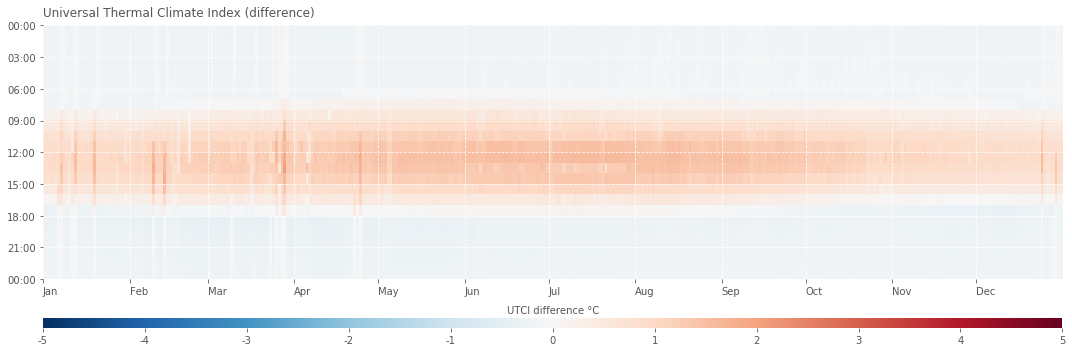

In [7]:
import numpy as np
plot.heatmap((np.array(utci_dict["Baseline_CoolPavement_NoWind"]) - np.array(utci_dict["Baseline_NoWind"])), plot_type="diff")